EDA and a little regression on my running over the last year

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models for scikit learn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline



#models eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score,mean_absolute_error,mean_squared_error

from sklearn.metrics import plot_roc_curve

file_2020= (r'C:\Users\Dan\Desktop\Garmin\Running 2020.csv')
df_2020= pd.read_csv(file_2020, parse_dates=['Date'])


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df_2020.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
0,Running,2020-12-31 23:29:00,False,Boston Running,0.50,49,03:36.5,154,172,175,...,0,0,03:36.5,0:00,0,0:00,No,03:36.5,1,0
1,Running,2020-12-31 17:41:00,False,Boston Running,8.38,942,1:00:31,174,192,179,...,0,0,1:00:31,0:00,0,0:00,No,02:49.3,9,0
2,Running,2020-12-30 17:28:00,False,Boston Running,7.58,851,0:54:38,174,191,179,...,0,0,54:38:00,0:00,0,0:00,No,04:04.8,8,0
3,Running,2020-12-29 16:37:00,False,Boston Running,6.76,778,0:51:05,173,186,177,...,0,0,51:05:00,0:00,0,0:00,No,06:08.4,7,0
4,Running,2020-12-27 17:22:00,False,Boston Running,6.34,747,0:47:32,176,184,178,...,0,0,47:32:00,0:00,0,0:00,No,02:31.3,7,0


In [3]:
df_2020.describe()

,Distance,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Min Temp,Number of Laps,Max Temp
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.0,195.0,195.0,195.0,195.0,195.000000,195.0
mean,5.134308,159.974359,176.625641,180.287179,194.928205,85.005128,101.066667,1.198205,0.0,0.0,0.0,0.0,0.0,0.0,5.887179,0.0
std,1.821937,11.735239,10.407588,3.104634,12.077284,45.250107,42.027859,0.094642,0.0,0.0,0.0,0.0,0.0,0.0,1.857720,0.0
min,0.350000,131.000000,140.000000,173.000000,180.000000,7.000000,16.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
25%,4.010000,151.000000,169.000000,178.000000,188.000000,59.000000,72.000000,1.180000,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0
50%,5.020000,157.000000,176.000000,180.000000,192.000000,75.000000,98.000000,1.210000,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0
75%,6.080000,171.000000,185.500000,182.000000,196.000000,98.000000,126.500000,1.230000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,0.0
max,12.000000,184.000000,198.000000,190.000000,248.000000,430.000000,256.000000,1.330000,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0


In [4]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             195 non-null    object        
 1   Date                      195 non-null    datetime64[ns]
 2   Favorite                  195 non-null    bool          
 3   Title                     195 non-null    object        
 4   Distance                  195 non-null    float64       
 5   Calories                  195 non-null    object        
 6   Time                      195 non-null    object        
 7   Avg HR                    195 non-null    int64         
 8   Max HR                    195 non-null    int64         
 9   Avg Run Cadence           195 non-null    int64         
 10  Max Run Cadence           195 non-null    int64         
 11  Avg Pace                  195 non-null    object        
 12  Best Pace             

In [5]:
df_2020.isnull().sum()

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Avg Run Cadence             0
Max Run Cadence             0
Avg Pace                    0
Best Pace                   0
Elev Gain                   0
Elev Loss                   0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Training Stress Score®      0
Grit                        0
Flow                        0
Climb Time                  0
Bottom Time                 0
Min Temp                    0
Surface Interval            0
Decompression               0
Best Lap Time               0
Number of Laps              0
Max Temp                    0
dtype: int64

In [6]:
#columns I'll care about later
col_list=['Distance','Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence','Avg Stride Length']

In [7]:

df_data=df_2020.groupby([pd.Grouper(key='Date',freq='M')])['Distance'].sum()
print('milage per month')
print(df_data);
print('----------------------')
total_milage=df_2020['Distance'].values.sum()
print('total milage:',total_milage)
df_miles_monthly=df_data.resample('M').sum()
print('Avg miles per month',round(df_miles_monthly.mean()))

milage per month
Date
2020-01-31     89.20
2020-02-29     75.30
2020-03-31     80.10
2020-04-30     64.28
2020-05-31     75.46
2020-06-30     87.12
2020-07-31     78.27
2020-08-31    104.62
2020-09-30     71.85
2020-10-31     55.40
2020-11-30     81.85
2020-12-31    137.74
Freq: M, Name: Distance, dtype: float64
----------------------
total milage: 1001.19
Avg miles per month 83


In [8]:
df_data=df_2020.groupby([pd.Grouper(key='Date',freq='W')])['Distance'].sum()
print('milage per week')
print(df_data);
print('----------------------')
total_milage=df_2020['Distance'].values.sum()
print('total milage:',total_milage)
df_miles_weekly=df_data.resample('W').sum()
print('Avg miles per week',round(df_miles_weekly.mean()))

milage per week
Date
2020-01-05    14.18
2020-01-12    21.92
2020-01-19    18.74
2020-01-26    21.52
2020-02-02    18.85
2020-02-09    15.67
2020-02-16    18.54
2020-02-23    24.80
2020-03-01    10.28
2020-03-08    21.90
2020-03-15    12.31
2020-03-22    21.79
2020-03-29    24.10
2020-04-05     8.23
2020-04-12    15.02
2020-04-19    14.46
2020-04-26    14.44
2020-05-03    22.15
2020-05-10    10.12
2020-05-17    19.19
2020-05-24    10.64
2020-05-31    25.49
2020-06-07    21.65
2020-06-14    22.57
2020-06-21    22.15
2020-06-28    20.75
2020-07-05    15.44
2020-07-12    14.93
2020-07-19    22.08
2020-07-26    16.81
2020-08-02    13.46
2020-08-09    22.41
2020-08-16    27.83
2020-08-23    16.59
2020-08-30    33.34
2020-09-06    22.38
2020-09-13    21.40
2020-09-20    12.95
2020-09-27    10.11
2020-10-04     5.01
2020-10-11     9.38
2020-10-18    17.13
2020-10-25    16.85
2020-11-01    18.11
2020-11-08     8.86
2020-11-15    25.89
2020-11-22    19.55
2020-11-29    21.48
2020-12-06    29.76

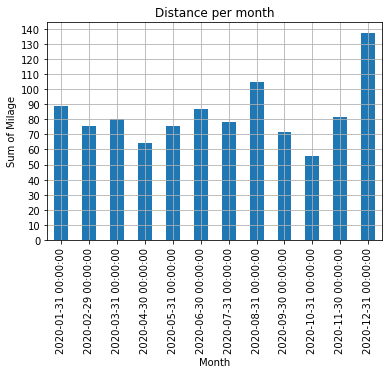

In [9]:
df_miles_monthly.plot.bar()
plt.yticks(np.arange(0,150,step=10))

plt.xlabel('Month')
plt.ylabel('Sum of Milage')
plt.title("Distance per month")
plt.grid();

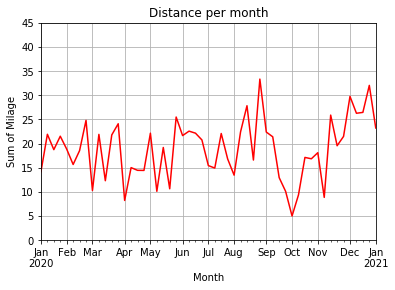

In [10]:
df_miles_weekly.plot(color='r')
plt.yticks(np.arange(0,50,step=5))

plt.xlabel('Month')
plt.ylabel('Sum of Milage')
plt.title("Distance per month")
plt.grid();


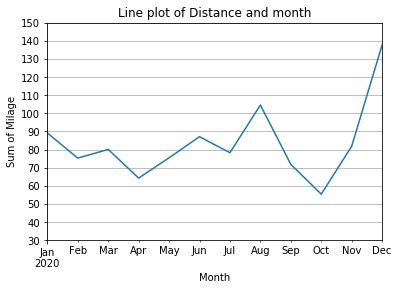

In [11]:
df_miles_monthly.plot()
plt.yticks(np.arange(30,160,step=10))
plt.xlabel('Month')
plt.ylabel('Sum of Milage')
plt.title('Line plot of Distance and month')
plt.grid();


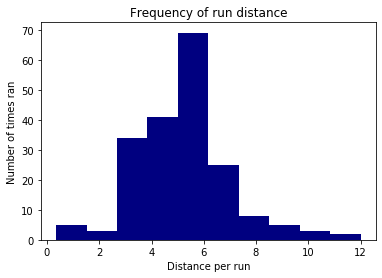

In [12]:
df_2020.Distance.plot.hist(bins=10,color='navy')
plt.xlabel('Distance per run')
plt.ylabel('Number of times ran')
plt.title('Frequency of run distance');

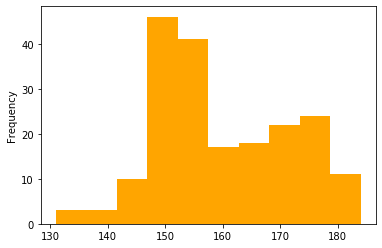

In [13]:
df_2020['Avg HR'].plot.hist(bins=10,color='orange');

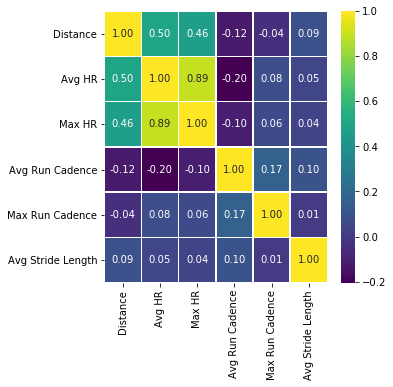

In [14]:
corr_matrix=df_2020[col_list].corr()
fig,ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='viridis');

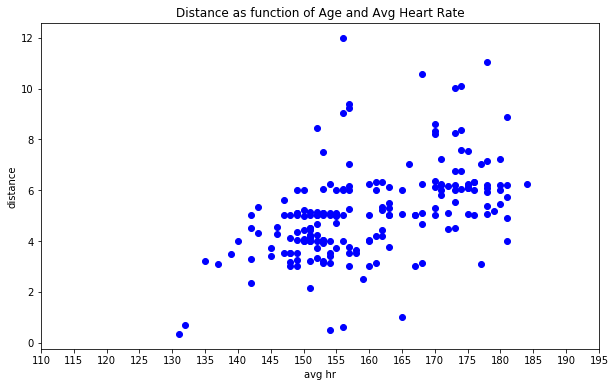

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df_2020['Avg HR'],
            df_2020['Distance'], 
            c="blue") 

plt.title("Distance as function of Age and Avg Heart Rate")
plt.xlabel("avg hr")
plt.xticks(np.arange(110,200,step=5))
plt.ylabel("distance");

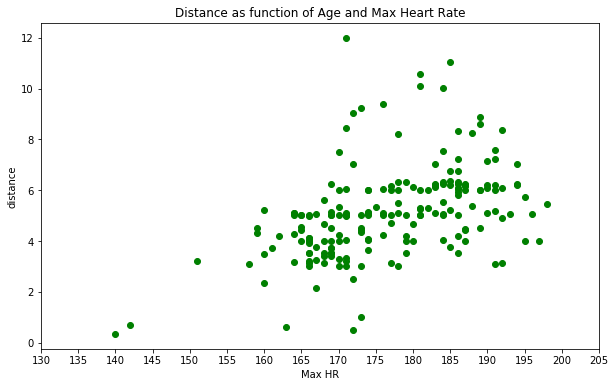

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df_2020['Max HR'],
            df_2020['Distance'], 
            c="green") 

plt.title("Distance as function of Age and Max Heart Rate")
plt.xlabel("Max HR")
plt.xticks(np.arange(130,210,step=5))

plt.ylabel("distance");

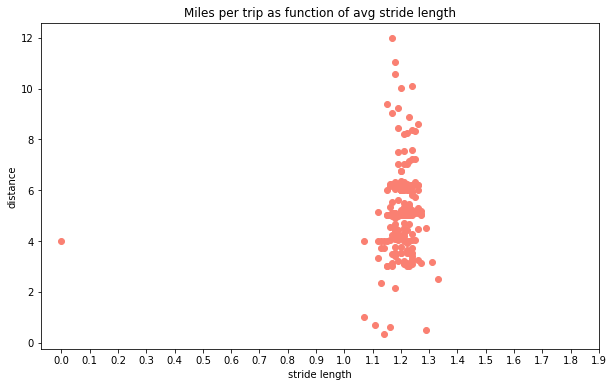

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df_2020['Avg Stride Length'],
            df_2020['Distance'], 
            c="salmon") 

plt.title("Miles per trip as function of avg stride length")
plt.xlabel("stride length")
plt.xticks(np.arange(0,2,step=.1))

plt.ylabel("distance");

In [18]:
df_2020.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Elev Gain', 'Elev Loss', 'Avg Stride Length',
       'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Training Stress Score®', 'Grit', 'Flow', 'Climb Time', 'Bottom Time',
       'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time',
       'Number of Laps', 'Max Temp'],
      dtype='object')

In [19]:
df_2020.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
0,Running,2020-12-31 23:29:00,False,Boston Running,0.50,49,03:36.5,154,172,175,...,0,0,03:36.5,0:00,0,0:00,No,03:36.5,1,0
1,Running,2020-12-31 17:41:00,False,Boston Running,8.38,942,1:00:31,174,192,179,...,0,0,1:00:31,0:00,0,0:00,No,02:49.3,9,0
2,Running,2020-12-30 17:28:00,False,Boston Running,7.58,851,0:54:38,174,191,179,...,0,0,54:38:00,0:00,0,0:00,No,04:04.8,8,0
3,Running,2020-12-29 16:37:00,False,Boston Running,6.76,778,0:51:05,173,186,177,...,0,0,51:05:00,0:00,0,0:00,No,06:08.4,7,0
4,Running,2020-12-27 17:22:00,False,Boston Running,6.34,747,0:47:32,176,184,178,...,0,0,47:32:00,0:00,0,0:00,No,02:31.3,7,0


In [20]:

df_train=pd.DataFrame(df_2020[col_list])

In [21]:
#RandomForestRegressor
np.random.seed(11)
#split into dependent and independent variables
X= df_train.drop('Distance',axis=1)
y= df_train['Distance']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
random_forest_model = RandomForestRegressor(n_jobs=-1)
                                                       
# Fit the model
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
random_forest_model.score(X_train,y_train)

0.8850939624867872

In [23]:
y_preds= random_forest_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.053189743589743

In [24]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    scores = {'training data mae': mean_absolute_error(y_train, train_preds),
             'valid mae': mean_absolute_error(y_test,val_preds),
             'train mean squared error': mean_squared_error(y_test,y_preds),
             'training R^2': r2_score(y_train,train_preds),
             'valid R^2': r2_score(y_test,val_preds)}
    return scores

In [25]:
show_scores(random_forest_model)

{'training data mae': 0.44835961538461516,
 'valid mae': 1.053189743589743,
 'train mean squared error': 2.3423528369230726,
 'training R^2': 0.8850939624867872,
 'valid R^2': 0.20958965590408107}

In [26]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

4.868461538461538

In [27]:
df= pd.DataFrame(data={'actual values':y_test,
                      'predicted values': y_preds})
df['diff']=df['predicted values']-df['actual values']
df.head()

,actual values,predicted values,diff
173,4.32,4.2122,-0.1078
61,6.01,7.8706,1.8606
54,6.01,6.1419,0.1319
128,4.02,5.3194,1.2994
88,5.15,4.7866,-0.3634


In [28]:
#Ridge model
np.random.seed(11)

X= df_train.drop('Distance',axis=1)
y= df_train['Distance']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
ridge_model = Ridge()
                                                       
# Fit the model
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.24251424668760468

In [29]:
show_scores(ridge_model)

{'training data mae': 1.1617160405795304,
 'valid mae': 1.0701254042265747,
 'train mean squared error': 2.3423528369230726,
 'training R^2': 0.24638296212189348,
 'valid R^2': 0.24251424668760468}

In [30]:
mean_absolute_error(y_test, y_preds)

1.053189743589743

In [31]:
y_preds= ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.0701254042265747

In [33]:
df= pd.DataFrame(data={'actual values':y_test,
                      'predicted values': y_preds})
df['diff']=df['predicted values']-df['actual values']
df.head(10)

,actual values,predicted values,diff
173,4.32,4.091054,-0.228946
61,6.01,6.289370,0.279370
54,6.01,6.473085,0.463085
128,4.02,5.154695,1.134695
88,5.15,4.711886,-0.438114
16,4.46,6.088248,1.628248
22,6.21,6.650910,0.440910
111,1.01,5.713020,4.703020
169,6.00,4.532561,-1.467439
33,6.11,5.642804,-0.467196
